# Load all Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

import warnings
warnings.filterwarnings('ignore')

print('Imported successfully')

Imported successfully


In [2]:
data= pd.read_csv("fraudcreditcard.csv")

# Exploratory Data Analysis

In [3]:
data.head(n=10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
# Check for normal transactions and fraudulent ones
counts = data.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

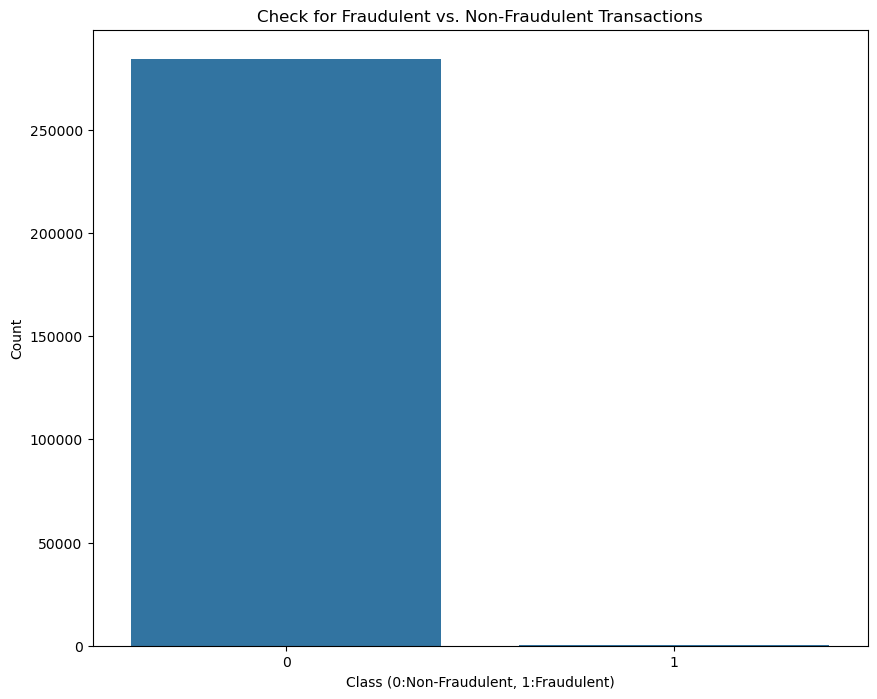

In [5]:
plt.figure(figsize=(10,8))
sns.barplot(x=counts.index, y=counts)
plt.title('Check for Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Text(0.5, 1.0, 'Heatmap of Correlation')

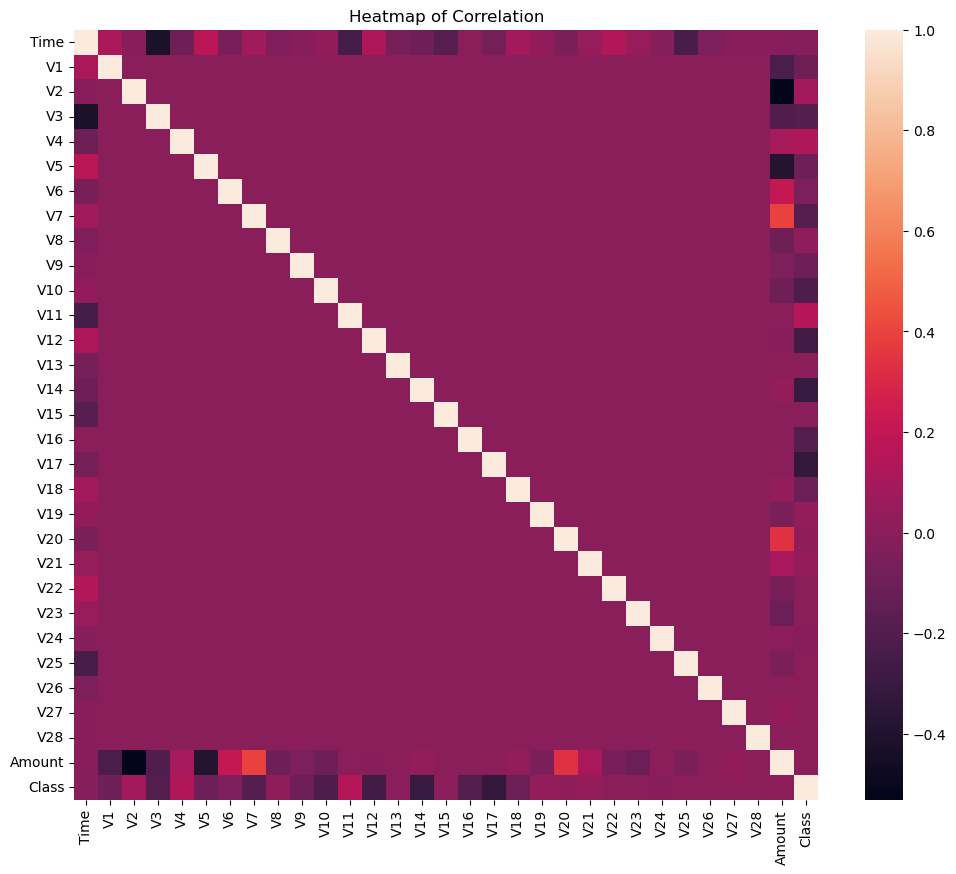

In [6]:
#finding correlation between columns and plotting heatmap

corr = data.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [7]:
data.tail()

data.shape

data.isnull().sum()

data.info()

data['Class'].value_counts()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


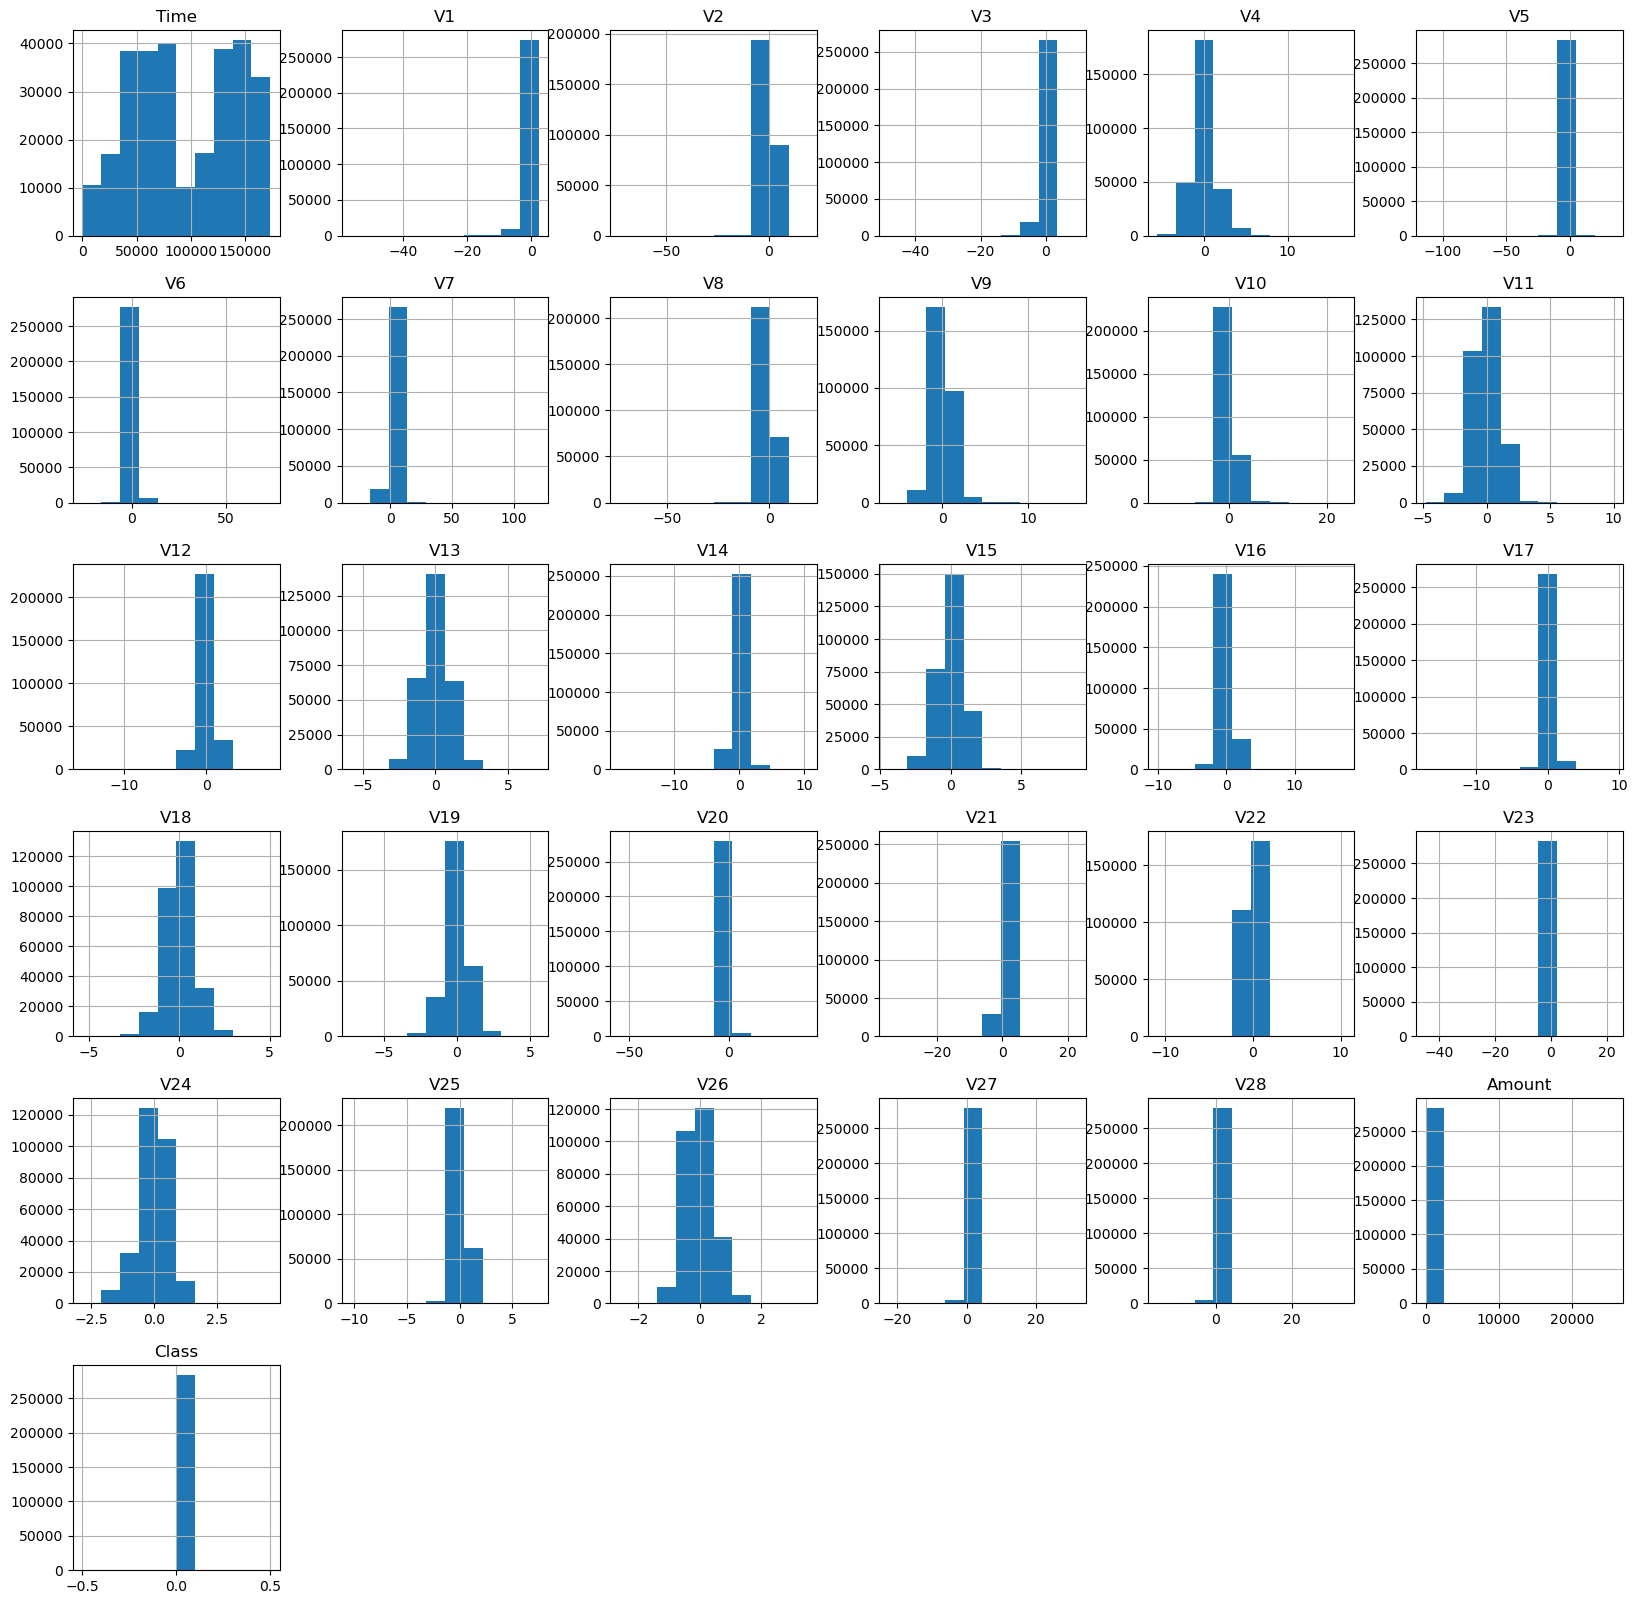

In [8]:
# Normal transaction
data[data.Class == 0].hist(figsize = (20,20))
plt.show()

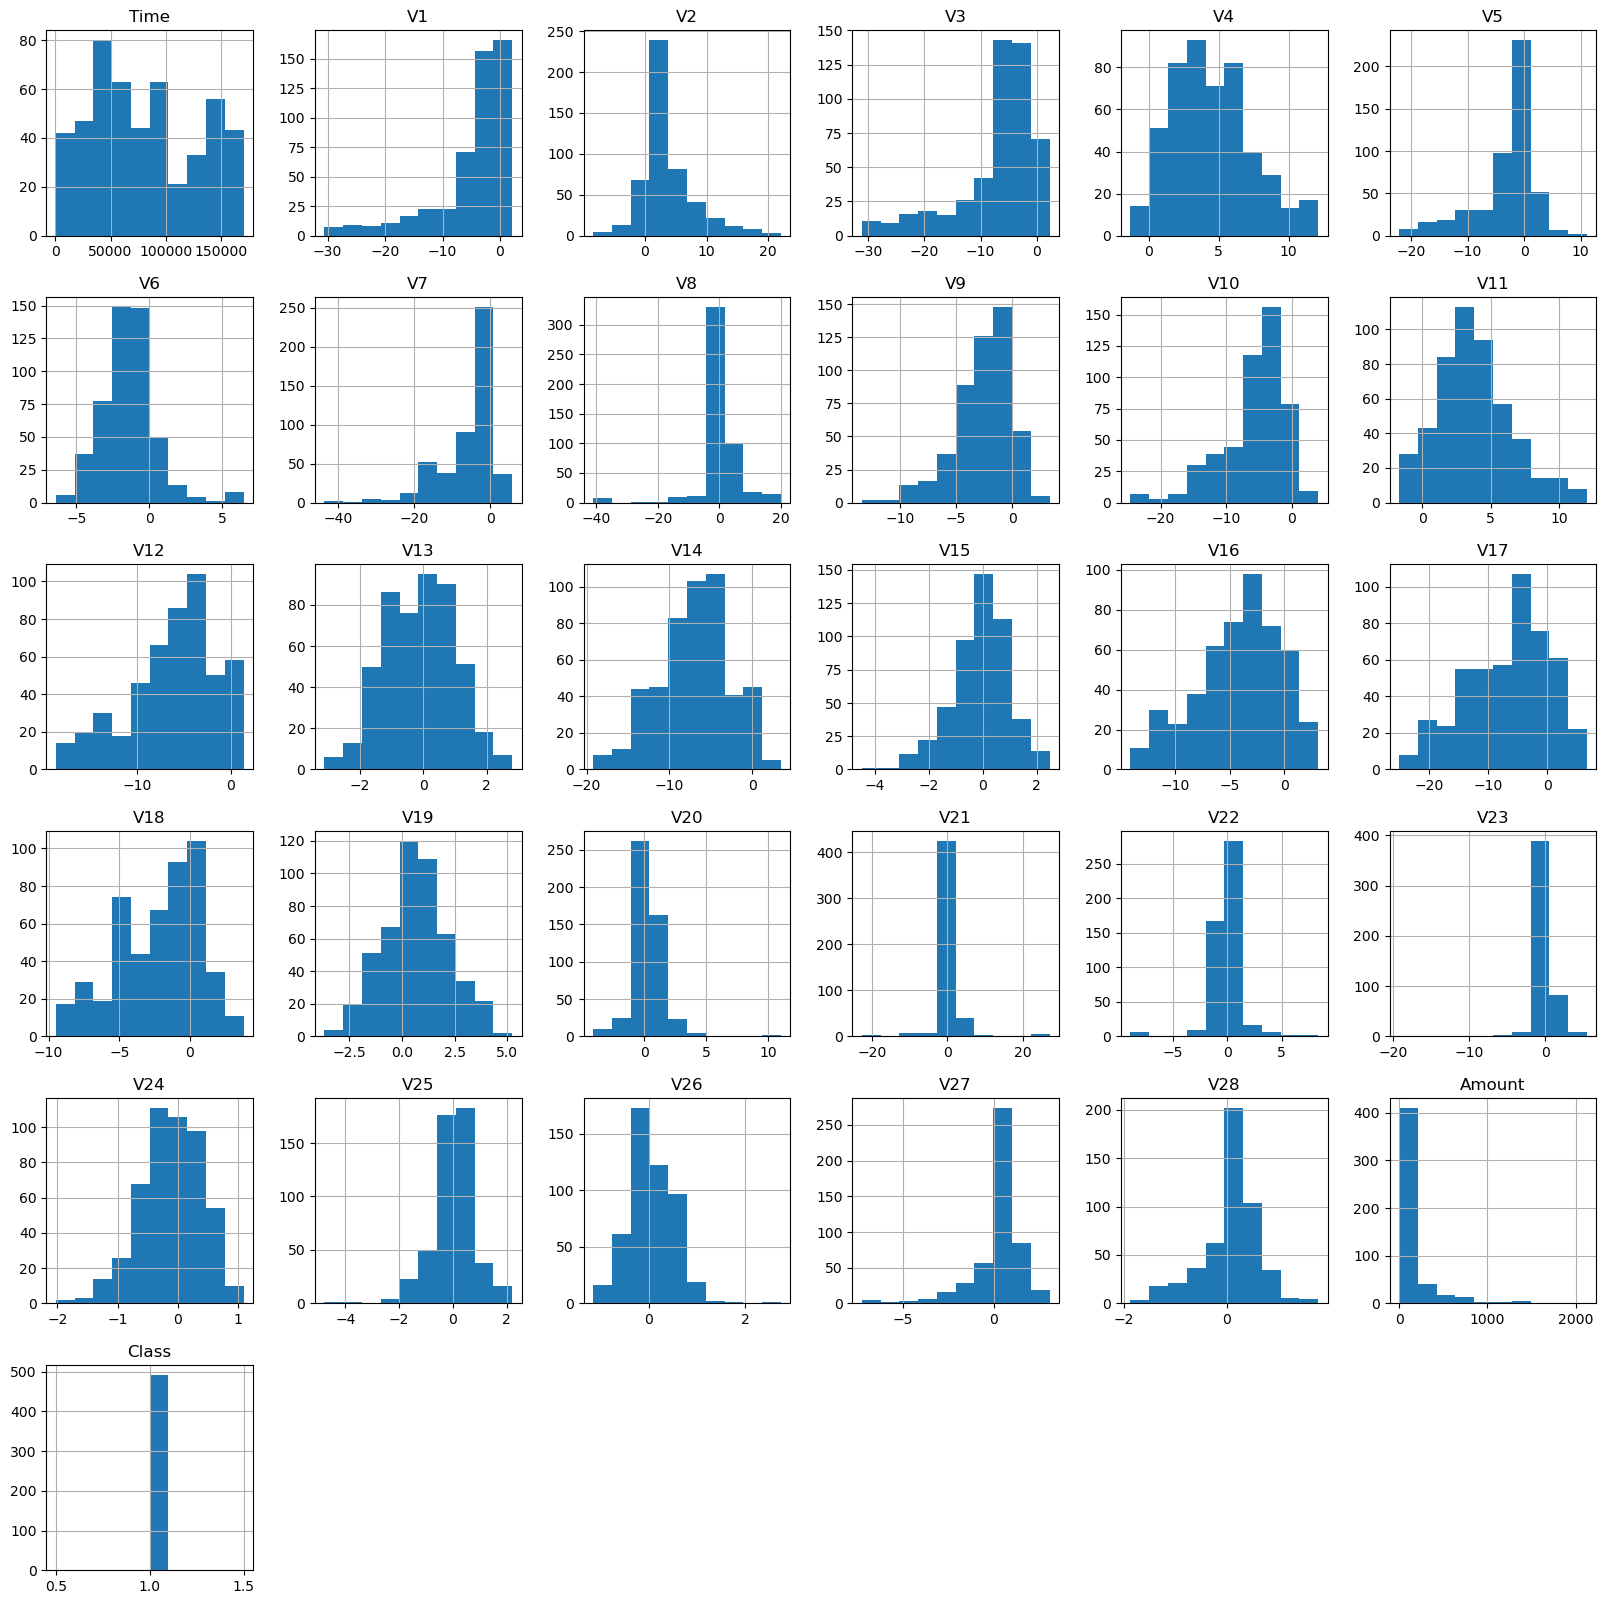

In [9]:
# Fraud transaction
data[data.Class == 1].hist(figsize = (20,20))
plt.show()

In [10]:
#Changing time to Min and Hours
new_time = pd.to_timedelta(data['Time'], unit='s')
data['Time_min'] = (new_time.dt.components.minutes).astype(int)
data['Time_hour'] = (new_time.dt.components.hours).astype(int)

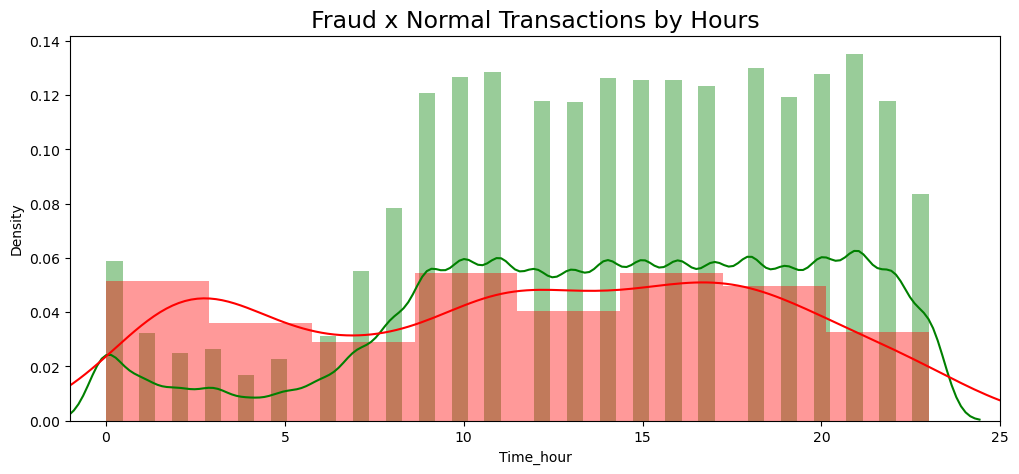

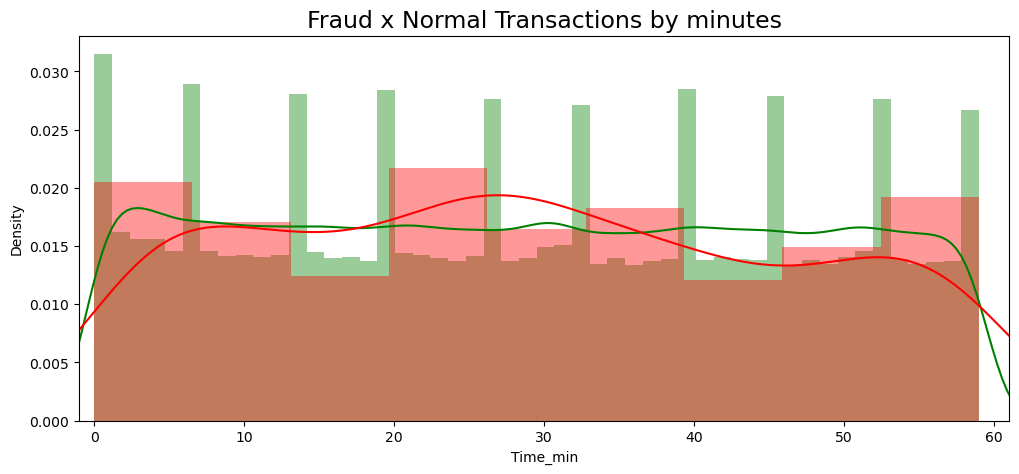

In [11]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(data[data['Class'] == 0]["Time_hour"], 
             color='g')
sns.distplot(data[data['Class'] == 1]["Time_hour"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

plt.figure(figsize=(12,5))
sns.distplot(data[data['Class'] == 0]["Time_min"], 
             color='g')
sns.distplot(data[data['Class'] == 1]["Time_min"], 
             color='r')
plt.title('Fraud x Normal Transactions by minutes', fontsize=17)
plt.xlim([-1,61])
plt.show()

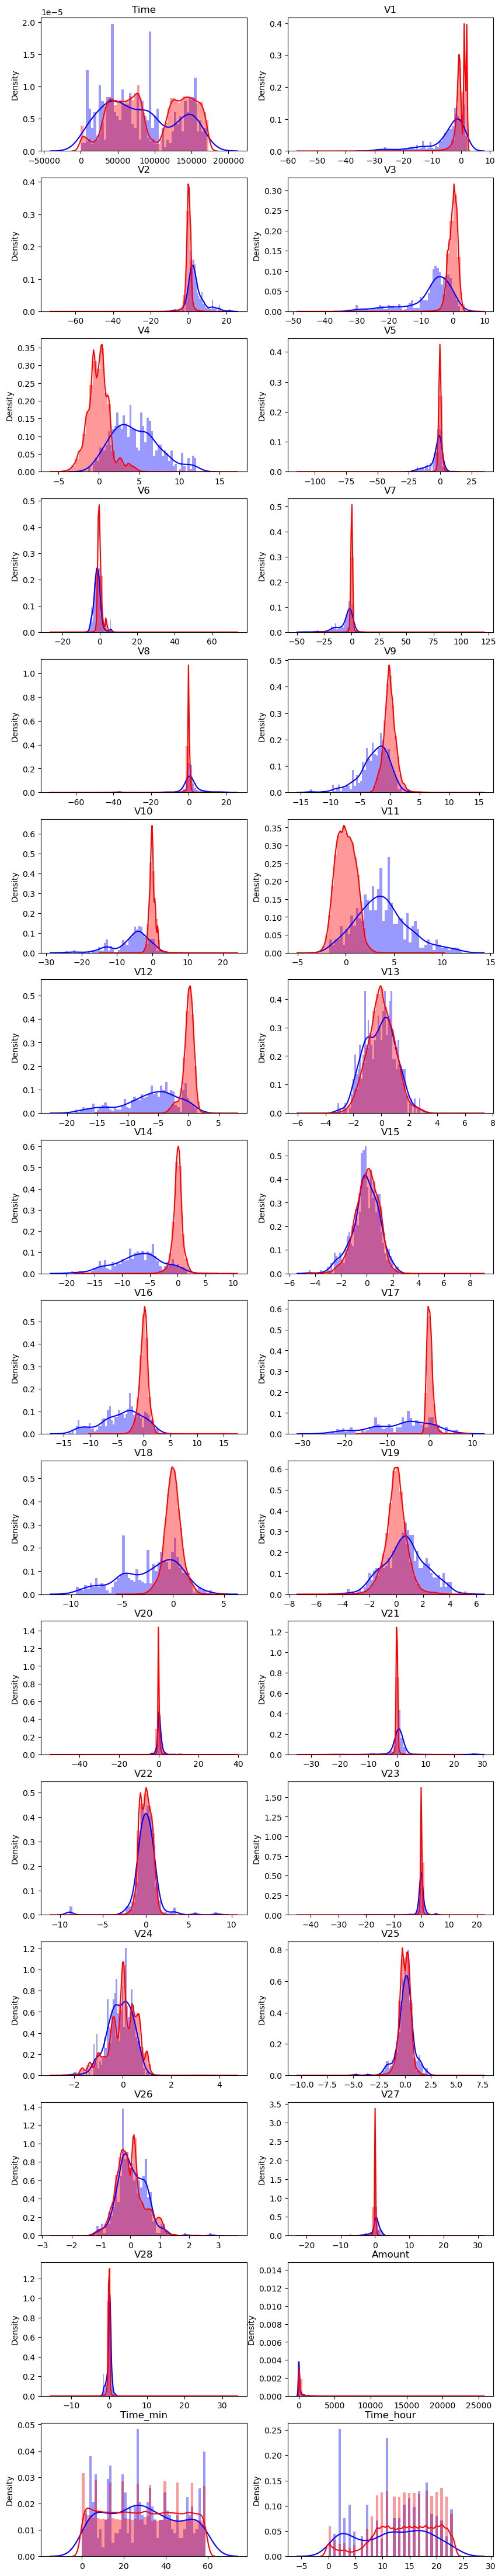

In [12]:
#Feature Selection via distribution graphs

import matplotlib.gridspec as gridspec # to do the grid of plots #  gridspec work same as plt.subplots
columns  = data.iloc[:,data.columns  != 'Class'].columns
frauds = data.Class == 1
normals = data.Class == 0
grid = gridspec.GridSpec(17, 2)
plt.figure(figsize=(10,15*4))

for n, col in enumerate(data[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(data[col][frauds], bins = 50, color='b') #Will receive the "semi-salmon" violin
    sns.distplot(data[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [13]:
# some features would be dropped because they have almost the same distribution
data_features = data.drop(['V15','V17','V24','V27','Time_hour','Time','Time_min'], axis = 1)

In [14]:
data_features.shape

(284807, 26)

# Data Spliting

In [15]:
from sklearn.model_selection import train_test_split

data_training, data_testing = train_test_split(data_features,test_size = 0.2, random_state = 42,stratify = data_features.Class)

#data_testing.Class.value_counts()

In [16]:
from sklearn.model_selection import train_test_split

# Assuming data_features contains your feature columns and 'Class' represents the target variable
X = data_features.drop('Class', axis=1)  # Features
y = data_features['Class']  # Target variable

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
train_data,validation_data,train_label, validation_label = train_test_split(data_training.loc[:,data_training.columns != 'Class'],data_training.Class,test_size = 0.2, stratify  = data_training.Class,
                                                random_state = 42) 

In [18]:
# Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)
train_data_normalised = data_scaled.transform(train_data)
validation_data_normalised = data_scaled.transform(validation_data)

In [19]:
test_data = data_testing.loc[:, data_testing.columns != 'Class']
test_label = data_testing.Class
test_data_normalised = data_scaled.transform(test_data)

In [20]:
#test_data.shape

In [21]:
# changing the labels with boolean 
train_label,validation_label, test_label = train_label.astype(bool), validation_label.astype(bool), test_label.astype(bool)

# now  lets seperate the normal and fraud data out of training dataset 
normal_train_data = train_data_normalised[~train_label] # normal transactions out of train_data_normalised 
normal_test_data = test_data_normalised[~test_label] # normal transactions out of test_data_normalised
normal_validation_data = validation_data_normalised[~validation_label]

In [22]:
print(len(normal_train_data))
print(len(normal_test_data))
print(len(normal_validation_data))

181961
56864
45490


In [23]:
fraud_train_data = train_data_normalised[train_label]
fraud_test_data = test_data_normalised[test_label]
fraud_validation_data = validation_data_normalised[validation_label]

In [24]:
print(len(fraud_train_data))
print(len(fraud_test_data))
print(len(fraud_validation_data))

315
98
79


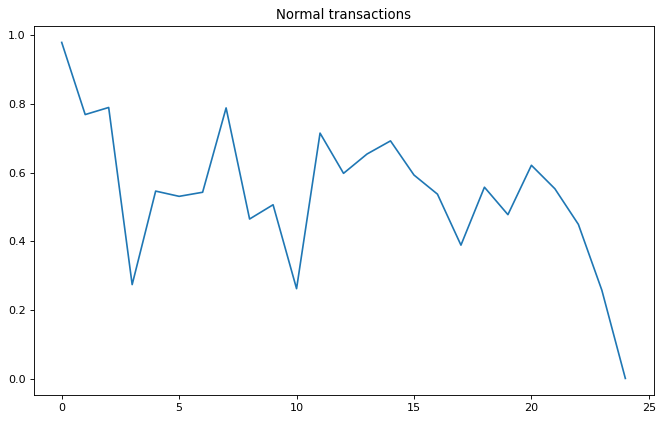

In [25]:
# Normal Transaction 
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
plt.plot(np.arange(25), normal_train_data[1])
plt.title('Normal transactions')

plt.show()

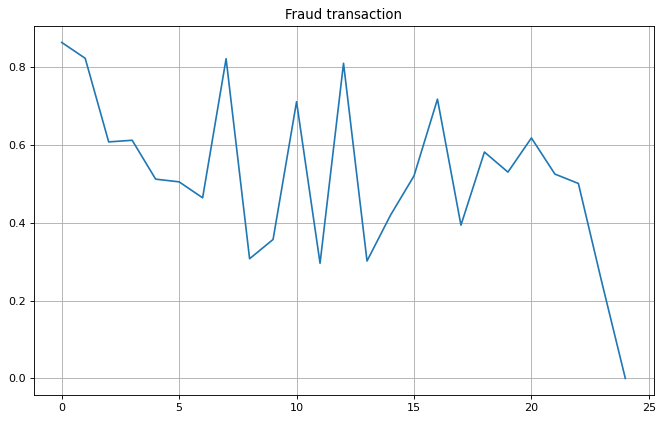

In [26]:
#Lets plot one from fraud transaction
figure(figsize=(10, 6), dpi=80)

plt.plot(np.arange(25), fraud_train_data[2])
plt.grid()
plt.title('Fraud transaction')
plt.show()

# MODEL BUILDING

In [27]:
import tensorflow 
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Model
from tensorflow.keras import models,layers,activations,losses,optimizers,metrics
from tensorflow.keras.callbacks import EarlyStopping
n_features = len(train_data.columns)
encoder = models.Sequential(name='encoder')
encoder.add(layer=layers.Dense(units=200, activation=activations.relu, input_shape=[n_features]))
encoder.add(layers.Dropout(0.1))
encoder.add(layer=layers.Dense(units=100, activation=activations.relu))
encoder.add(layer=layers.Dense(units=5, activation=activations.relu))

decoder = models.Sequential(name='decoder')
decoder.add(layer=layers.Dense(units=100, activation=activations.relu, input_shape=[5]))
decoder.add(layer=layers.Dense(units=200, activation=activations.relu))
decoder.add(layers.Dropout(0.1))
decoder.add(layer=layers.Dense(units=n_features, activation=activations.sigmoid))

autoencoder = models.Sequential([encoder, decoder])

autoencoder.compile(
	loss=losses.MSE,
	optimizer=optimizers.Adam(),
	metrics=[metrics.mean_squared_error])


Epoch 1/100
5687/5687 [==============================] - 6s 967us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 7.1256e-04 - val_mean_squared_error: 7.1256e-04
Epoch 2/100
5687/5687 [==============================] - 5s 948us/step - loss: 6.0517e-04 - mean_squared_error: 6.0517e-04 - val_loss: 4.8622e-04 - val_mean_squared_error: 4.8622e-04
Epoch 3/100
5687/5687 [==============================] - 5s 930us/step - loss: 5.1717e-04 - mean_squared_error: 5.1717e-04 - val_loss: 4.4379e-04 - val_mean_squared_error: 4.4379e-04
Epoch 4/100
5687/5687 [==============================] - 6s 1ms/step - loss: 4.8067e-04 - mean_squared_error: 4.8067e-04 - val_loss: 4.2036e-04 - val_mean_squared_error: 4.2036e-04
Epoch 5/100
5687/5687 [==============================] - 5s 953us/step - loss: 4.5607e-04 - mean_squared_error: 4.5607e-04 - val_loss: 3.9249e-04 - val_mean_squared_error: 3.9249e-04
Epoch 6/100
5687/5687 [==============================] - 5s 897us/step - loss: 4.3844e-04 - mea

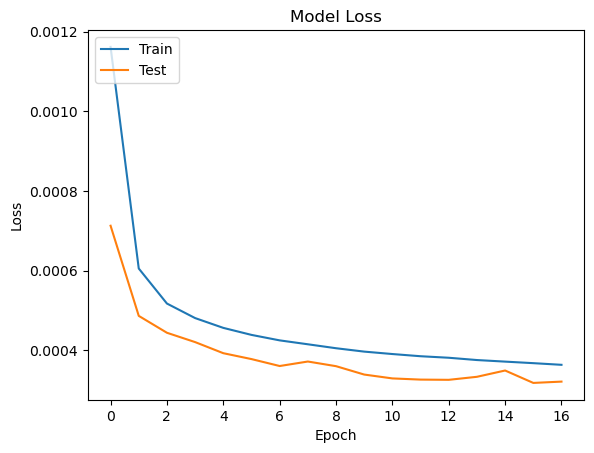

In [28]:
# train model
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=5,restore_best_weights=True)
history = autoencoder.fit(x=normal_train_data, y=normal_train_data, epochs=100, verbose=1, validation_data=(normal_validation_data, normal_validation_data), callbacks=[es])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1777/1777 [==============================] - 1s 326us/step


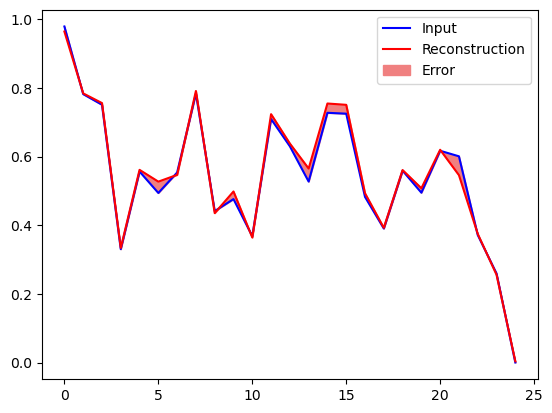

4/4 [==============================] - 0s 833us/step


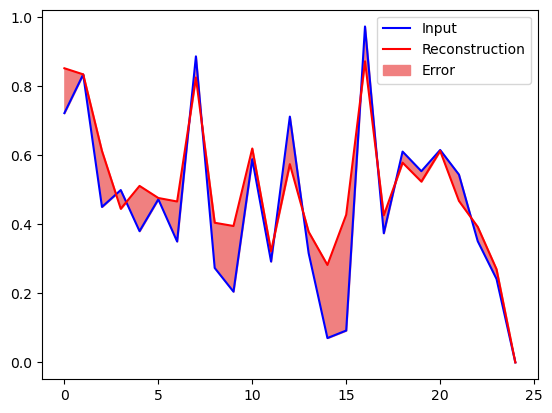

In [29]:
#Now let's define a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
  dec_img = autoencoder.predict(data) # this will decode or reconstruct
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(25), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

plot(normal_test_data, 4) # here n shows the index of ecg samples
plot(fraud_test_data, 4)

In [30]:
# Save the model 
autoencoder.save('Autoencoder_fraud.h5')

In [31]:
# calculating the train error  in legit transactions
reconstructed = autoencoder.predict(normal_train_data)
train_normal_loss = losses.mae(reconstructed, normal_train_data).numpy()
np.mean(train_normal_loss)

5687/5687 [==============================] - 2s 331us/step


0.011206398657655115

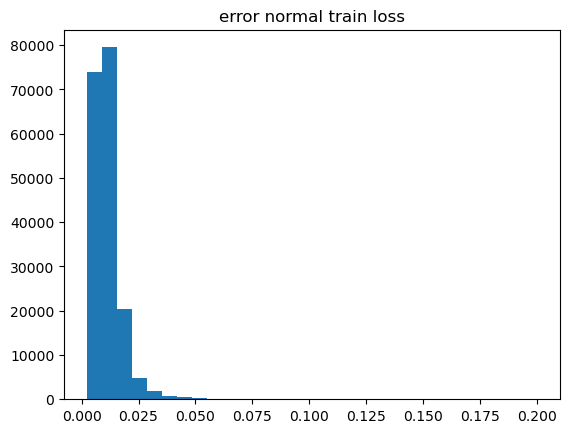

In [32]:
plt.hist(train_normal_loss, bins = 30)
plt.title('error normal train loss')
plt.show()

10/10 [==============================] - 0s 869us/step
0.05565541424731784


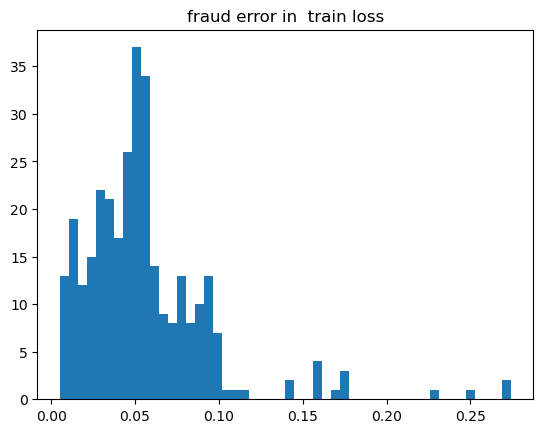

In [33]:
### calculating the train error  in fraud transactions
reconstructed = autoencoder.predict(fraud_train_data)
train_fraud_loss = losses.mae(reconstructed, fraud_train_data).numpy()
print(np.mean(train_fraud_loss))
plt.hist(train_fraud_loss, bins = 50)
plt.title('fraud error in  train loss')
plt.show()

from the plot above we can see that the error in fraud is greater than the normal transaction. this will be used to check for anomalies in our data  

# Integrating AE+LSTM

In [34]:

# Extract encoded representations (latent space)
encoded_train_data = autoencoder.predict(x_train)
encoded_test_data = autoencoder.predict(x_test)



1781/1781 [==============================] - 1s 324us/step


In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Reshape data for LSTM 
sequence_length = 10

def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequences.append(data[i:i+sequence_length])
    return np.array(sequences)

# Create sequences for LSTM input
train_sequences = create_sequences(encoded_train_data, sequence_length)
test_sequences = create_sequences(encoded_test_data, sequence_length)

# LSTM model
lstm_model = Sequential([
    LSTM(units=64, input_shape=(train_sequences.shape[1], train_sequences.shape[2]), return_sequences=True),
    # Add more LSTM layers or Dense layers if needed
    Dense(units=1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Train LSTM on sequences
lstm_model.fit(train_sequences, y_train[sequence_length-1:], epochs=20, batch_size=32, callbacks=[early_stopping], validation_split=0.1)

# Evaluate the model
score = lstm_model.evaluate(test_sequences, y_test[sequence_length-1:])
print("Test Accuracy:", score[1])

Epoch 1/20
6408/6408 [==============================] - 17s 3ms/step - loss: 0.0146 - accuracy: 0.9982 - val_loss: 0.0141 - val_accuracy: 0.9980
Epoch 2/20
6408/6408 [==============================] - 16s 3ms/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0140 - val_accuracy: 0.9980
Epoch 3/20
6408/6408 [==============================] - 16s 3ms/step - loss: 0.0124 - accuracy: 0.9983 - val_loss: 0.0139 - val_accuracy: 0.9980
Epoch 4/20
6408/6408 [==============================] - 15s 2ms/step - loss: 0.0123 - accuracy: 0.9983 - val_loss: 0.0139 - val_accuracy: 0.9980
Epoch 5/20
6408/6408 [==============================] - 17s 3ms/step - loss: 0.0123 - accuracy: 0.9983 - val_loss: 0.0140 - val_accuracy: 0.9981
Epoch 6/20
6408/6408 [==============================] - 16s 3ms/step - loss: 0.0122 - accuracy: 0.9983 - val_loss: 0.0137 - val_accuracy: 0.9981
Epoch 7/20
6408/6408 [==============================] - 15s 2ms/step - loss: 0.0122 - accuracy: 0.9983 - val_loss: 0.0138 - val_ac

In [36]:
Fraud = data.Class.sum()
total = len(data)
fraud_percentage = (Fraud/total)*100
fraud_percentage
# so lets say that 1% of transactions are fraud so lets find the threshold

0.1727485630620034

In [37]:
# calcualting the error in the whole train data 

reconstructed = autoencoder.predict(train_data_normalised)
#train_loss = np.mean(np.abs(reconstructed - train_data_normalised))
train_loss = losses.mae(reconstructed, train_data_normalised).numpy()

import numpy as np

# Assuming train_data_normalised and reconstructed are NumPy arrays



5697/5697 [==============================] - 2s 338us/step


In [38]:
# Evaluate the model
score = lstm_model.evaluate(test_sequences, y_test[sequence_length-1:])
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])


1780/1780 [==============================] - 2s 854us/step - loss: 0.0123 - accuracy: 0.9983
Test Loss: 0.012258351780474186
Test Accuracy: 0.9983111619949341


In [39]:
# we are assuming that we have 1% of fraud transaction here 
cut_off_1 = np.percentile(train_loss, 99)
cut_off_1

0.03594657289318567

In [40]:
cut_off_2 = np.mean(train_loss) + 5*np.std(train_loss)
cut_off_2
# 2std division covers 97% of the distribution and here i have taken 3 std division

0.044523386586871404

In [41]:
#Prediction on test data
reconstructed = autoencoder.predict(test_data_normalised)
errors = losses.mae(reconstructed, test_data_normalised)
predicted = [1 if error > cut_off_1 else 0 for error in errors]



1781/1781 [==============================] - 1s 320us/step


In [42]:
sorted_errors = np.sort(errors)[::-1]


In [43]:
predicted_fraud_cases = np.array(predicted).sum()
actual_fraud_cases = test_label.sum()
print('predicted_fraud_cases => {} true fraud cases => {}'.format(predicted_fraud_cases, actual_fraud_cases))


predicted_fraud_cases => 617 true fraud cases => 98


In [44]:
true_label = test_label.astype(int)


In [64]:
### classification report 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(true_label, predicted))
print(confusion_matrix(true_label, predicted))




              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.74      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.87      0.60     56962
weighted avg       1.00      0.99      0.99     56962

[[56320   544]
 [   25    73]]


Accuracy: 0.990010884449282
Precision: 0.11831442463533225
Recall: 0.7448979591836735
F1 Score: 0.20419580419580416
ROC AUC Score: 0.8676656368794001


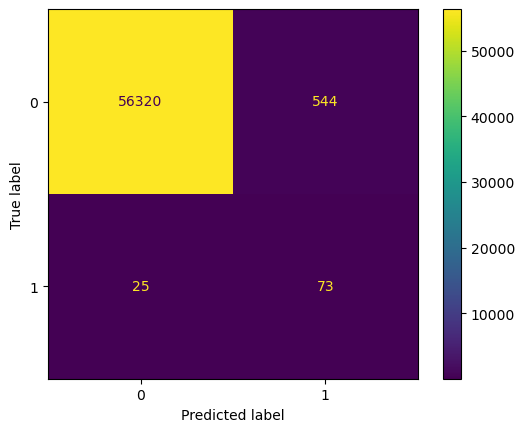

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(true_label, predicted)
precision = precision_score(true_label, predicted)
recall = recall_score(true_label, predicted)
f1 = f1_score(true_label, predicted)
roc_auc = roc_auc_score(true_label, predicted)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(true_label, predicted)
#print("Confusion Matrix:")
#print(conf_matrix)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()


AUC-ROC: 0.8676656368794001


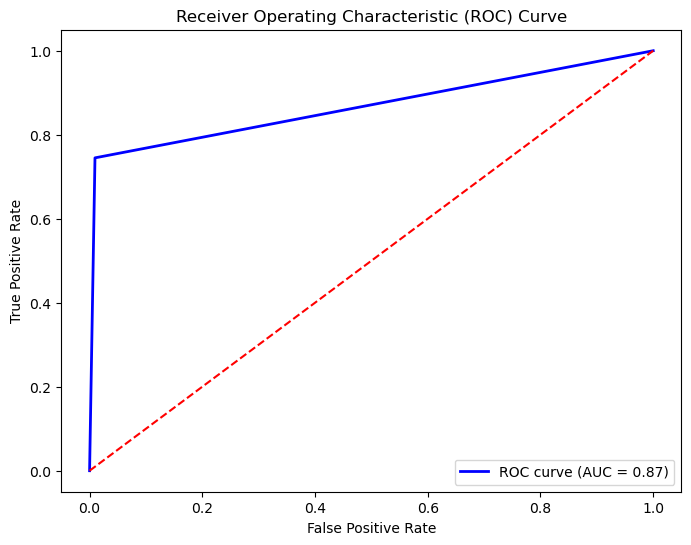

In [52]:
# from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_label, predicted)

# Calculate ROC-AUC
auc_roc = roc_auc_score(true_label, predicted)
print("AUC-ROC:", auc_roc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Epoch 1/20
6408/6408 [==============================] - 14s 2ms/step - loss: 0.0121 - accuracy: 0.9983 - val_loss: 0.0136 - val_accuracy: 0.9981
Epoch 2/20
6408/6408 [==============================] - 15s 2ms/step - loss: 0.0121 - accuracy: 0.9983 - val_loss: 0.0137 - val_accuracy: 0.9981
Epoch 3/20
6408/6408 [==============================] - 17s 3ms/step - loss: 0.0121 - accuracy: 0.9983 - val_loss: 0.0138 - val_accuracy: 0.9981
Epoch 4/20
6408/6408 [==============================] - 15s 2ms/step - loss: 0.0121 - accuracy: 0.9983 - val_loss: 0.0137 - val_accuracy: 0.9981


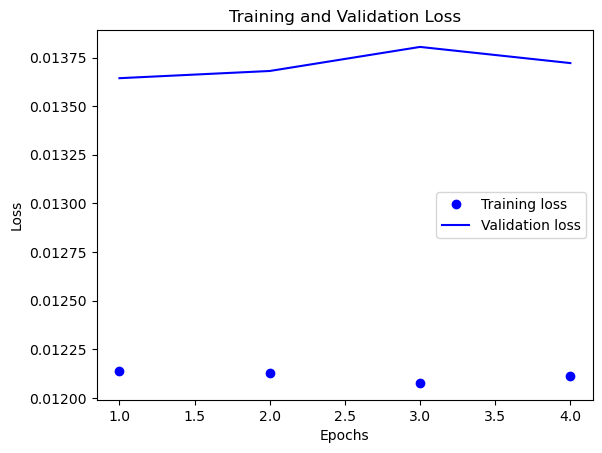

In [69]:
# Train LSTM on sequences with the defined callbacks
history = lstm_model.fit(train_sequences, y_train[sequence_length-1:], 
                         epochs=20, batch_size=32, 
                         callbacks=[early_stopping], 
                         validation_split=0.1)

# Access training history for loss and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the loss over epochs
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()  # Moved the plt.show() command here to display the plot


In [68]:
# Model training and evaluation lstm
losses = lstm_model.evaluate(test_sequences, y_test[sequence_length-1:])
predicted = [1 if loss > cut_off_1 else 0 for loss in losses]

1780/1780 [==============================] - 2s 871us/step - loss: 0.0123 - accuracy: 0.9983
